## Introduction:

In this tutorial i will build a machine learning model to predict the passengers survived or not survived in the famous Titanic tragedy.
<br>
To get a brief knowledge about the Titanic, the following links would help:

"The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew." 
<br>
Source: https://www.history.com/topics/early-20th-century-us/titanic

"How Did the 'Unsinkable' Titanic End Up at the Bottom of the Ocean?"
<br>
Watch this short movie by National Geographic: https://www.youtube.com/watch?v=4pywFRpEcZA 

In [7]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4pywFRpEcZA " frameborder="0" allowfullscreen></iframe>')

**Kaggle** which is an online community of data scientits lanuched a competition to apply the tools of machine learning tools to predict which passengers survived the tragedy with the following description:
<br>
"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy."
<br>
<br>
In this tutorial i am going to use Kaggle titanic dataset that i downloaded into my workstation to make a prediction for the passenger survivors.
<br>
You can download the training dataset from here: 
<br>
https://www.kaggle.com/c/titanic/download/train.csv
<br> 

## Data Loading, Exploration, and Visualization:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
titanic = pd.read_csv(r"C:\Users\Test\Downloads\Course\Kaggle\titanic\train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The discription of the attributes from Kaggle is as follows:

survival: Survival ( 0 = No, 1 = Yes )
<br>
pclass: Ticket class ( 1 = 1st, 2 = 2nd, 3 = 3rd )
<br>
sex: Sex
<br>
Age: Age in years
<br>
sibsp: # of siblings / spouses aboard the Titanic
<br>
parch: # of parents / children aboard the Titanic
<br>
ticket: Ticket number
<br>
fare: Passenger fare
<br>
cabin: Cabin number
<br>
embarked: Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )

In [14]:
# How many records and what data types do we have in the titanic dataframe ?
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So we have a total of 891 records with a mixure of continuous and catergorical features.
<br>
And it is seems that we have some missing data in the (Age, Cabin, Embarked) features.
<br>

In [15]:
# Do we have duplicate records in the dataset ? 
# The PassengerId column is added to uniquely identify each record, so let's drop it first.
titanic_no_id = titanic.drop('PassengerId', 1)
# Now we can check if the dataset have duplicate records or not
titanic_no_id[titanic_no_id.duplicated() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Great! There are no duplicate records.
<br>
It is the time to explore/visualize the titanic dataset by looping through the features to get the following results for each feature:
<br>
Number of existing entries
<br>
Number of missing entries
<br>
Value counts summary
<br>
Data type
<br>
Feature description ( To be read from a dictionary object )
<br>
A Histogram to compare the feature classes wrt the Survived Label

In [18]:
# Dictionary object which stores the description of the features
featuresDesc = {
    "PassengerId" : "type should be integers",
    "Survived" : "Survived or Not",
    "Pclass" : "Class of Travel",
    "Name" : "Name of Passenger",
    "Sex" : "Gender",
    "Age" : "Age of Passengers",
    "SibSp" : "Number of Sibling/Spouse aboard",
    "Parch" : "Number of Parent/Child aboard",
    "Ticket" : "",
    "Fare" : "",
    "Cabin" : "",
    "Embarked" : "The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown"
}

The column has all unique values
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64
Feature Description:  type should be integers

****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

0    549
1    342
Name: Survived, dtype: int64
Total records with values:  891
Total records with NaNs:  0
Feature Description:  Survived or Not


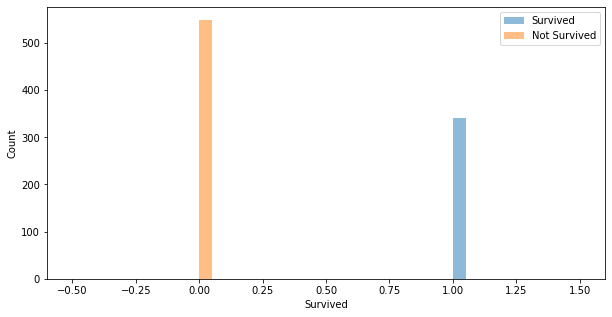


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

3    491
1    216
2    184
Name: Pclass, dtype: int64
Total records with values:  891
Total records with NaNs:  0
Feature Description:  Class of Travel


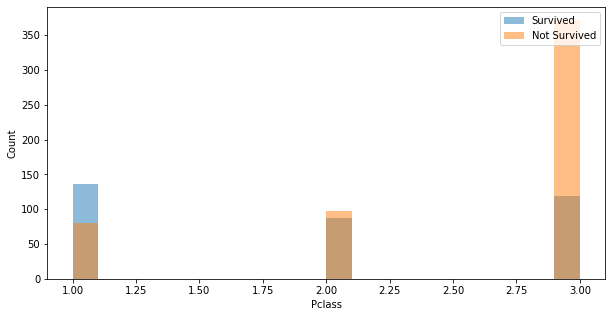


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

The column has all unique values
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
Feature Description:  Name of Passenger

****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

male      577
female    314
Name: Sex, dtype: int64
Total records with values:  891
Total re

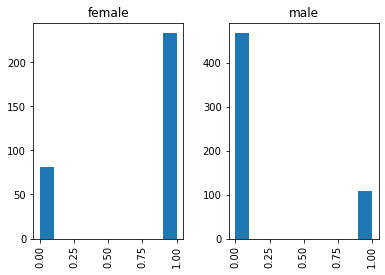


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
N

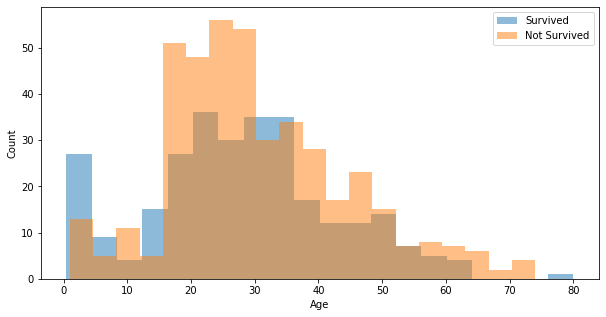


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Total records with values:  891
Total records with NaNs:  0
Feature Description:  Number of Sibling/Spouse aboard


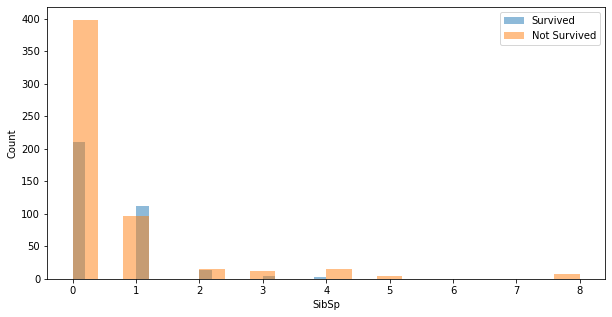


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Total records with values:  891
Total records with NaNs:  0
Feature Description:  Number of Parent/Child aboard


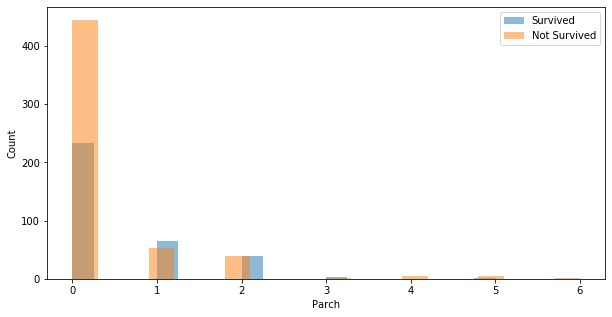


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

CA. 2343        7
1601            7
347082          7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
19950           4
4133            4
113760          4
349909          4
17421           4
2666            4
PC 17757        4
LINE            4
113781          4
347077          4
W./C. 6608      4
239853          3
C.A. 31921      3
363291          3
13502           3
230080          3
29106           3
24160           3
35273           3
371110          3
248727          3
PC 17755        3
               ..
PC 17610        1
228414          1
229236          1
27267           1
349251          1
4134            1
113767          1
PC 17476        1
248706          1
386525       

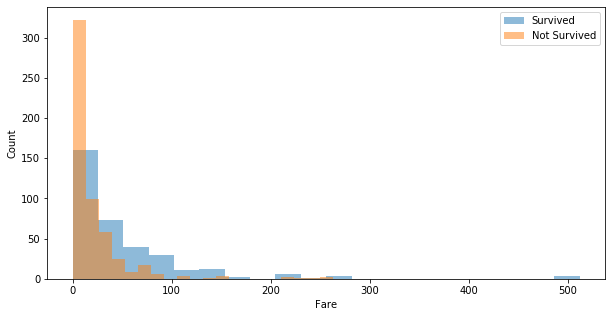


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
E101           3
F2             3
F33            3
C126           2
D20            2
F G73          2
C78            2
C65            2
C68            2
C52            2
E67            2
F4             2
E25            2
B58 B60        2
E33            2
C124           2
D35            2
E44            2
B49            2
D33            2
C83            2
D17            2
B51 B53 B55    2
D36            2
C125           2
              ..
D48            1
F G63          1
E17            1
B3             1
T              1
A32            1
B39            1
C45            1
B101           1
A7             1
C62 C64        1
C106           1
A2

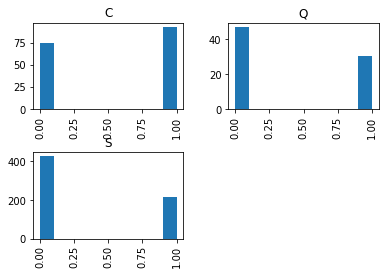


****************************************************
****************************************************
****************************************************
****************************************************
****************************************************



In [23]:
for column in titanic:
    #print(source[column])
    if titanic[column].duplicated().any() == True:
        print( titanic[column].value_counts() )
        print( 'Total records with values: ', titanic[column].count())
        print( 'Total records with NaNs: ', titanic[column].isnull().sum())
        print( 'Feature Description: ', featuresDesc[column])
        
        if titanic[column].dtype == np.float64 or titanic[column].dtype == np.int64:
            plt.figure(figsize=(10,5))
            plt.hist(titanic[titanic['Survived'] == 1][column], bins=20, Alpha=0.5, label = 'Survived')
            plt.hist(titanic[titanic['Survived'] == 0][column], bins=20, Alpha=0.5, label = 'Not Survived')
            plt.legend(loc='upper right')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.show()
        else:
            if len(titanic[column].unique().tolist()) <= 6:
                titanic.hist(by=column,column = 'Survived')
                plt.show()
            else: 
                print('The column has {} unique categorical values and will not be visualized'.format(len(titanic[column].unique().tolist())))
        
    else:
        print('The column has all unique values')
        print( titanic[column].head() )
        print( 'Feature Description: ', featuresDesc[column])
    print('')
    print('****************************************************')
    print('****************************************************')
    print('****************************************************')
    print('****************************************************')
    print('****************************************************')
    print('')

## Outcomes with some Feature Engineering:
1) **Survived** ( 342 passenger survived out of the 891 total passengers in the test dataset )
<br>
2) **PClass** ( The majorty of the passengers are on the 3rd class of travel,  the higher the class the higher the survival rate )
<br>
3) **Sex** ( female passengers have a higher survival rate than for the male passengers )
<br>
4) **Age** ( ranges from 0 to 80 years, normal distribution skewed left, 0-15 & 25-35 years have higher survival rate when compared to other ranges, 177 missing values )
<br>
5) **SibSp** & **Parch** ( Passengers traveling alone with no relatives have a lower rate of survival )
<br>
6) **Ticket** ( Some passengers shares the same ticket number due to travelling together and in many cases are relatives )
<br>
7) **Fare** ( The low ticket fare have low survival rate, same as the PClass nothing new )
<br>
8) **Cabin** ( Has a lot of missing values and it is better to discard it )
<br>
9) **Embarked** ( Majority of passengers embarked in Southampton port, Passengers embarked in Cherbourg have higher survival rate when compared to Southhampton and Queenstown ports )
<br>
<br>
Since we have passengers sharing the same ticket number which means they know each other or in other words traveling together and in most cases are relatives, The dataset can be visualized with a graph to let us have a better data understanding. 
<br>
<br>
networkx library is suitable for visualizing graphs:

In [24]:
import networkx as nx

The following is a funtion for drawing the network and it takes three inputs:
<br>
1) Pclass: The class of travel ( the graph will draw only the passenger that are in one class of travel at a time because drawing all of the passengers in one graph will not be clear ).
<br>
2) size1: hoizontal length of the plot.
<br>
3) size2: vertical length of the plot.
<br>
<br>
What will be drawn:
<br>
1) each passenger will be represented as node in the graph.
<br>
2) the nodes representing passengers that shares the same ticket will connected together.
<br>
3) The graph will represent a male passenger with a circle node shape and female passenger with a triangle node shape.
<br>
4) The Survived passengers will have green color node and the not survived passengers will have red color node.

In [27]:
def draw_titanic_network( Pclass, size1, size2 ):
    
    # Filter the passengers with the input class
    df_class = titanic.loc[titanic['Pclass'].isin([Pclass])]

    # To draw edges we need to know which passengers shares the same ticket number and which are traveling alone
    source_tickets = df_class['Ticket'].copy()
    source_tickets_dups = source_tickets[source_tickets.duplicated()].copy()
    source_dups = df_class[df_class['Ticket'].isin( source_tickets_dups)] 
    source_not_dups =  df_class[~df_class['Ticket'].isin( source_tickets_dups)]

    # Creating lists that holds passengers traveling alone and wehter survived or not and wether male or female passenger
    source_not_dups_survived = source_not_dups[source_not_dups['Survived'].isin([1])]
    source_not_dups_survived_male = list( source_not_dups_survived[source_not_dups_survived['Sex'].isin(['male'])]['Name'] )
    source_not_dups_survived_female = list( source_not_dups_survived[source_not_dups_survived['Sex'].isin(['female'])]['Name'] )
    source_not_dups_not_survived = source_not_dups[~source_not_dups['Survived'].isin([1])]
    source_not_dups_not_survived_male = list( source_not_dups_not_survived[source_not_dups_not_survived['Sex'].isin(['male'])]['Name'] )
    source_not_dups_not_survived_female = list( source_not_dups_not_survived[source_not_dups_not_survived['Sex'].isin(['female'])]['Name'] )

    # Creating a networkx object that have edges connecting the passenger nodes sharing the same ticket together  
    FG = nx.from_pandas_edgelist(source_dups, source='Name', target='Ticket', edge_attr='Survived',)

    # Creating lists that holds the passengers that are not traveling alone and whether survived or not and wether male or female passenger 
    arr_color_female = []
    arr_color_male = []
    nodes_female = []
    nodes_male = []

    for node in list(FG.nodes()):
    
        if len(FG.edges(node)) == 1 & df_class['Name'].isin([node]).any() == True:

            if df_class['Sex'].loc[df_class['Name'].isin([node])].iloc[0] == 'female':
                nodes_female.append(node)
                if df_class['Survived'].loc[df_class['Name'].isin([node])].iloc[0] == 1:
                    arr_color_female.append('green')
                else:
                    arr_color_female.append('red') 
            else:
                nodes_male.append(node)
                if df_class['Survived'].loc[df_class['Name'].isin([node])].iloc[0] == 1:
                    arr_color_male.append('green')
                else:
                    arr_color_male.append('red')

    # Creating the plot with figure input figure sizes
    plt.figure(1,figsize=(size1,size2))
    
    # Draw the edge ( i.e. lines connecting nodes that shares the same ticket )
    position=nx.spring_layout(FG)
    nx.draw_networkx_edges(FG, pos=position)

    # Draw nodes that represents passengers that are not travelling alone and set its colors and shapes
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40,node_color=arr_color_female, nodelist=nodes_female, node_shape='v', pos=position)
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40,node_color=arr_color_male, nodelist=nodes_male, node_shape='o', pos=position)

    # Draw nodes that represents passengers that are traveling alone and set its colors and shapes
    FG.add_nodes_from source_not_dups_survived_male )
    position=nx.spring_layout(FG, scale=0.15)
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40, node_color='green', nodelist=source_not_dups_survived_male, node_shape='o', pos=position)

    FG.add_nodes_from( source_not_dups_not_survived_male )
    position=nx.spring_layout(FG, scale=0.7)
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40, node_color='red', nodelist=source_not_dups_not_survived_male, node_shape='o', pos=position)

    FG.add_nodes_from( source_not_dups_survived_female )
    position=nx.spring_layout(FG, scale=0.5)
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40, node_color='green', nodelist=source_not_dups_survived_female, node_shape='v', pos=position)

    FG.add_nodes_from( source_not_dups_not_survived_female )
    position=nx.spring_layout(FG, scale=0.4)
    nx.draw_networkx_nodes(FG, with_labels=False, node_size=40, node_color='red', nodelist=source_not_dups_not_survived_female, node_shape='v', pos=position)

    #plt.legend(['Class 3'], prop={'size': 15}, frameon=True) 
    plt.axis('off')
    plt.show()

A long function :( , but let's see the results
<br>
<br>
Drawing passengers for the 1st class:

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


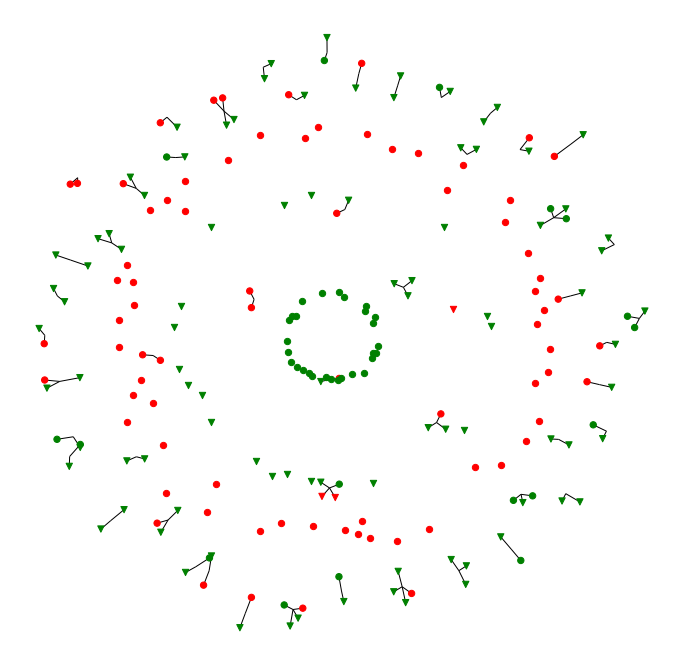

In [30]:
draw_titanic_network(1, 12, 12)

The graph is telling us the following about the 1st class:
<br>
<br>
1) The majority of the passengers in the 1st class are male passengers ( circle nodes )
<br>
2) The survived male passengers traveling alone are less than the not survived ones.
<br>
3) Only one female passenger traveling alone not survived.
<br>
4) Passengers not traveling alone ( travel groups ) have a higher survival rate when compared to passengers traveling alone.
<br>
5) Some Passengers groups have the female passengers Survived while male passengers not survived.
<br>
<br>
What about class 2 ?

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


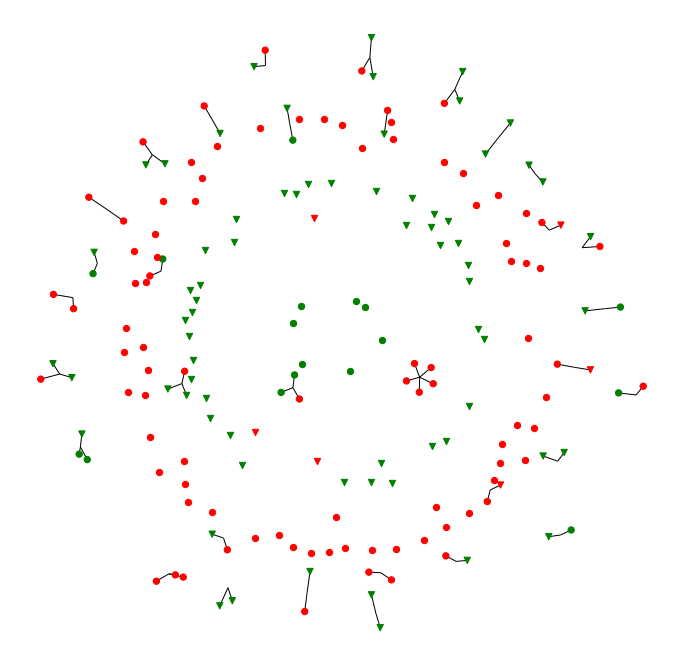

In [31]:
draw_titanic_network(2, 12, 12)

Class 2 is to some extent similar to Class 1

What about class 3 ( adjusting the graph size to 18 x 18 because we have higher number of nodes ) ?

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


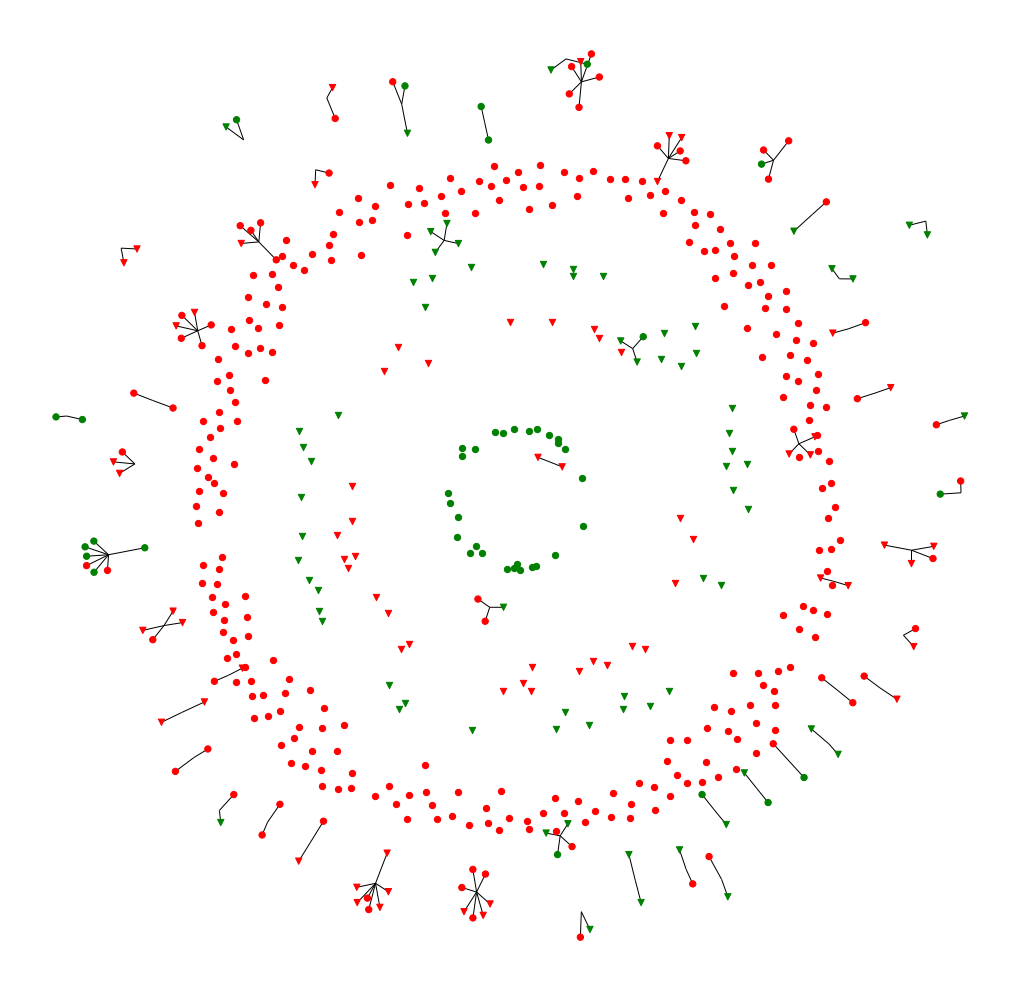

In [35]:
draw_titanic_network(3, 18, 18)

Passengers in 3rd class have a low survival rate when compared to class 1 & class 2.
<br>
Passengers traveling in groups in many cases survived together or not survived. ( An indication that this feature is important in predicting the survived passengers ).

## Modeling
Note: In this tutorial i will build a Naive Bayes classifier model to predict our target label and build other classification models in later updates of this tutorial.
<br>
<br>
Naive Bayes classifier is based on the Bayes theorm which classifies the target label according to its probabilities related to the existance of a certain input pattern in the features while assuming that the features doesn't depend on each other.
<br>
This means that this classifier might not help in using the insight we extracted previously that the passengers sharing the same ticket number have a relation with the survival i.e. survived togher and not survived together.
<br>
<br>
Example: In our test dataset we have 549 passenger not survived and 342 survived and that means the probability of not surviving is higher than surviving, but if know that the passenger gender is female, the probability of surviving will be affected by this input and be increased accordingly and so on for the other inputs.
<br>
<br>
To build a Naive Bayes classifier we need to select the input features and preprocess them so that we can properly use them as an input to our model.
<br>
I'll be using Scikit learn library to create an instance of the Naive Bayes classification model. and this model only accept numerical input for our features and expects that the features does not have missing values.
<br>
<br>
I will select the Pclass, Sex, Age, Embarked features as an input to this model while our label target is the Survived column.
<br>
The Pclass, Sex, Embarked features are categorical features and we have to convert them into numerical values representing the categories they hold using the sklearn Label Encoder.
<br>
The Embarked and Age features have missing values and requires to be filled by values or dropping the records that have missing information.
<br>
The other features are discarded because they are not suitable for this classifier or requires a different of classification algorithm and to avoid having overfitted model. 

In [36]:
from sklearn import preprocessing

In [38]:
Sex_Encoded = None
Embarked_Encoded = None
le = preprocessing.LabelEncoder()
Sex_Encoded = le.fit_transform(titanic['Sex']) # female will be replaced with the number (1) and male will be the number (0)
Sex_Encoded = pd.DataFrame(Sex_Encoded)
Embarked_Encoded = le.fit_transform(titanic['Embarked'].fillna('C')) # Embarked have 2 missing values filled with 'C' value
Embarked_Encoded = pd.DataFrame(Embarked_Encoded)

The 'Age' feature have 177 missing which is a quite high number, and if we drop these records we will end up with a smaller dataset and that is not recommended.
<br>
Instead i will fill the missing random values within the range of the ages in our test dataset and maintain the original distrbution of it.

Missing Values in Age:  177
Age Histogram wrt to Survived before filling na values


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


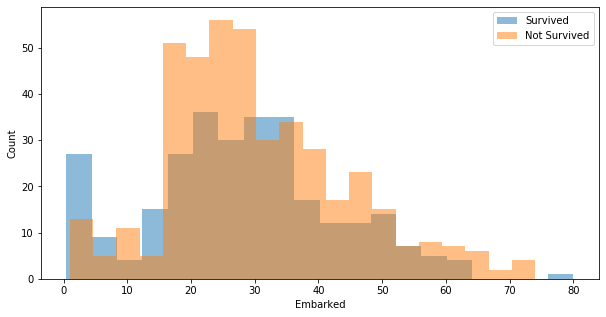

Missing Values in Age:  0
Age Histogram wrt to Survived after filling na values with random values in Age range


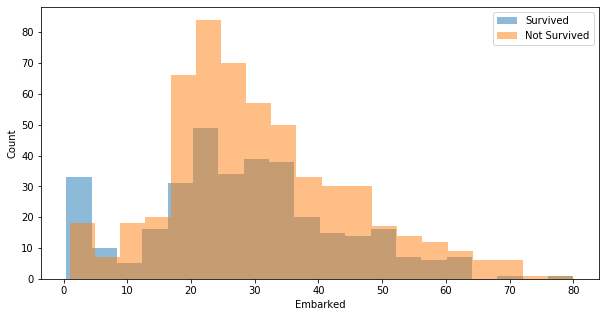

In [41]:
print( 'Missing Values in Age: ', titanic['Age'].isna().sum() )
print( 'Age Histogram wrt to Survived before filling na values')
plt.figure(figsize=(10,5))
plt.hist(titanic[titanic['Survived'] == 1]['Age'], bins=20, Alpha=0.5, label = 'Survived')
plt.hist(titanic[titanic['Survived'] == 0]['Age'], bins=20, Alpha=0.5, label = 'Not Survived')
plt.legend(loc='upper right')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

Age_Counts = titanic['Age'].value_counts(normalize=True)
missing = titanic['Age'].isnull()
titanic.loc[missing,'Age'] = np.random.choice(Age_Counts.index, size=len(titanic[missing]),p=Age_Counts.values)

print( 'Missing Values in Age: ', titanic['Age'].isna().sum() )
print( 'Age Histogram wrt to Survived after filling na values with random values in Age range')

plt.figure(figsize=(10,5))
plt.hist(titanic[titanic['Survived'] == 1]['Age'], bins=20, Alpha=0.5, label = 'Survived')
plt.hist(titanic[titanic['Survived'] == 0]['Age'], bins=20, Alpha=0.5, label = 'Not Survived')
plt.legend(loc='upper right')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

Filling the Age missing values with random values will have a negative effect on the prediction, but let's accept this risk for the time being.

Now we combine the selected and preprocessed features in one dataframe.

In [43]:
features = Sex_Encoded.copy()
features.rename(columns={ features.columns[0]: "Sex" }, inplace=True)
features['Pclass'] = titanic['Pclass']
features['Age'] = titanic['Age']
# I discarded the Embarked feature after i found that it decreased the model accuracy.
# features['Embarked'] = Embarked_Encoded
features.head(10)

,Sex,Pclass,Age
0,1,3,22.0
1,0,1,38.0
2,0,3,26.0
3,0,1,35.0
4,1,3,35.0
5,1,3,42.0
6,1,1,54.0
7,1,3,2.0
8,0,3,27.0
9,0,2,14.0


The label 'Survived' is already encoded with 0s indicating not survived and 1s indicating survived passengers, and there is no need to apply any preprocessing on it.

In [45]:
label = titanic['Survived']
print( label[:10] )

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


Now we can build our Naive bayes classifier as follows: 

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split # to split the original test dataset into sub train and test sets
from sklearn.metrics import classification_report # to get the performance metrics of our model

Splitting the original dataset is necessary to evaluate the model accuracy.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
print('X_train: \t', len(X_train),  X_train[:10])
print('X_test: \t', len(X_test), X_test[:10])
print('y_train: \t', len(y_train), y_train[:10])
print('y_test: \t', len(y_test), y_test[:10])

X_train: 	 712      Sex  Pclass   Age
625    1       1  61.0
334    0       1  19.0
274    0       3  34.0
869    1       3   4.0
204    1       3  18.0
642    0       3   2.0
146    1       3  27.0
668    1       3  43.0
446    0       2  13.0
774    0       2  54.0
X_test: 	 179      Sex  Pclass   Age
394    0       3  24.0
283    1       3  19.0
799    0       3  30.0
569    1       3  32.0
187    1       1  45.0
286    1       3  30.0
347    0       3  24.0
616    1       3  34.0
72     1       2  21.0
231    1       3  29.0
y_train: 	 712 625    0
334    1
274    1
869    1
204    1
642    0
146    1
668    0
446    1
774    1
Name: Survived, dtype: int64
y_test: 	 179 394    1
283    1
799    0
569    1
187    1
286    1
347    1
616    0
72     0
231    0
Name: Survived, dtype: int64


In [48]:
# Creating and fitting the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
# Predicting the Survived label using the sub test dataset
y_pred = model.predict(X_test)
print( type(y_pred) )
#show a sample of the predicted values
print( y_pred[:10] )

<class 'numpy.ndarray'>
[1 0 1 0 0 0 1 0 0 0]


## Model Evaluation

In [50]:
from sklearn import metrics

In [51]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8100558659217877


Great! Our Naive Bayes Model resulted in 81% accuracy.

What about the confusion matrix reseults ?

In [52]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print( 'True Neg: ', tn)
print( 'False Neg: ', fn)
print( 'True Pos: ', tp)
print( 'False Pos: ', fp)

True Neg:  90
False Pos:  9
False Neg:  25
True Pos:  55


Not bad.
<br>
<br>
But to be confident that the model performance will work well on unseen data i will use the cross validation class of the sklearn library which basically splits the dataset into training and test sets and evaluate the model and then splits the data again ensuring the previous split does not have the same splitted values of the the next split.
<br>
<br>
This cross validation technique helps us know that our model is generalized enough to result in good accuracy when applied on unseen data. 

In [53]:
from sklearn.model_selection import cross_validate

In [54]:
cv_results = cross_validate(model, features, label, scoring='accuracy', cv=5) # 5 different folds/splits
print( 'Accuracy for each split: ', cv_results['test_score'] )
print( 'Mean Accuracy: ', cv_results['test_score'].mean())

Accuracy for each split:  [0.79888268 0.81005587 0.79213483 0.75280899 0.78531073]
Mean Accuracy:  0.7878386204348059


## Conclusion

Wonderful. With this we can expect that our Naive Bayes model will result in around 79% accuracy on unseen data such as the titanic test dataset in kaggle competition.

Next: Can we get better accuracy using other classification algorithm ?
Let's invistigate it later.

Author: Alaa J. Jaradat
<br>
Linkedin Profile: https://www.linkedin.com/in/alaa-jaradat-4a279128/
<br>
Date/Time: July 08, 2019 17:54 AST
<br>
<br>
To be continued. Stay Tuned.